# 예제 2. XGBoost로 유방암 예측하고 설명 얻기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier, to_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pydot
import pygraphviz

In [ ]:
cancer = load_breast_cancer()

In [ ]:
# DataFrame으로 만들기
# x_data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# y_data = pd.DataFrame(cancer.target)

x_data, x_test, y_data, y_test =  train_test_split(cancer.data,cancer.target, test_size=0.1, shuffle=False)
x_train, x_val, y_train, y_val =  train_test_split(x_data, y_data, test_size=0.1, shuffle=True, stratify = y_data, random_state=34)

In [ ]:
# 유방암 진단 데이터를 XGBoost로 학습시키기기
model = XGBClassifier()#max_depth=5, n_estimators=60, gpu_id = 0)
model.fit(x_train,y_train)

XGBClassifier()

Validation Accuracy: 96.15%
Precision : 0.969
Recall : 0.969


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


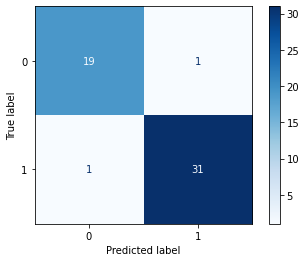

In [ ]:
#  Validation의 Accuracy와 Confusion Matrix 확인하기 
plot_confusion_matrix(model, x_val, y_val, cmap = plt.cm.Blues)  

y_pred = model.predict(x_val)
predictions = [np.round(value) for value in y_pred]
accuracy = accuracy_score(y_val, predictions)

cm = confusion_matrix(predictions, y_val)
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

print('Validation Accuracy: %.2f%%' % (accuracy * 100.0))
print('Precision : {:.3f}'.format(tp / (tp + fp)))
print('Recall : {:.3f}'.format(tp / (tp + fn)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Accuracy: 100.00%
Precision : 1.000
Recall : 1.000


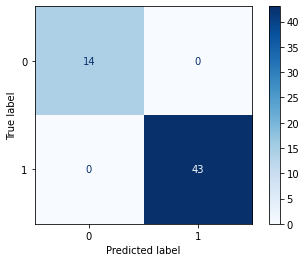

In [ ]:
#  Test의 Accuracy와 Confusion Matrix 확인하기 
plot_confusion_matrix(model, x_test, y_test, cmap = plt.cm.Blues)  

y_pred = model.predict(x_test)
predictions = [np.round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)


cm = confusion_matrix(predictions, y_test)
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

print('Test Accuracy: %.2f%%' % (accuracy * 100.0))
print('Precision : {:.3f}'.format(tp / (tp + fp)))
print('Recall : {:.3f}'.format(tp / (tp + fn)))

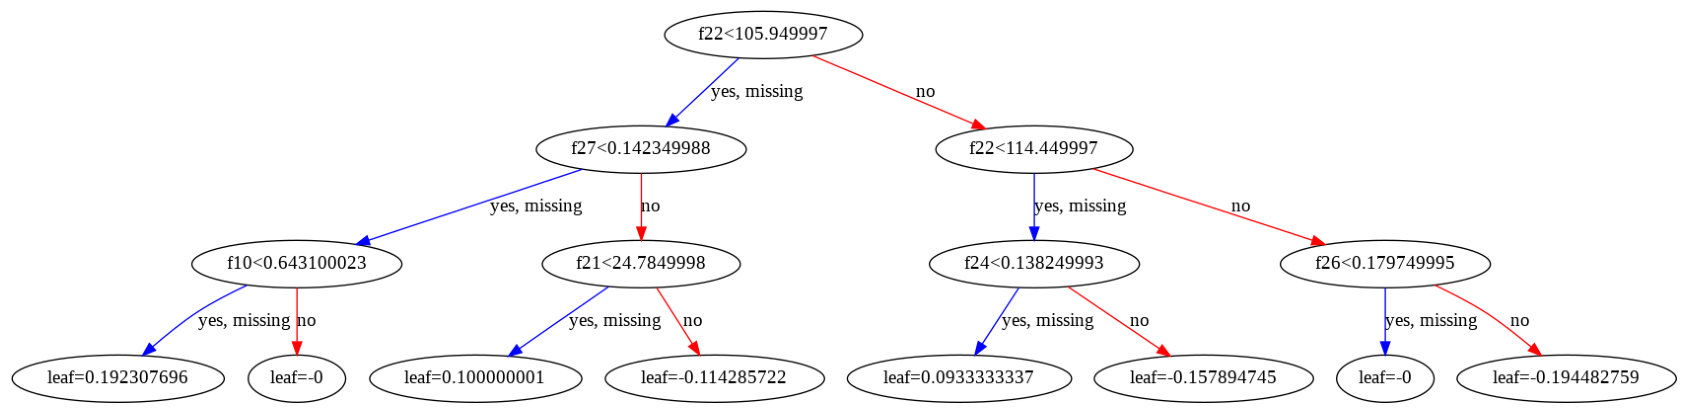

In [ ]:
%matplotlib inline

from matplotlib.pylab import rcParams
from xgboost import plot_tree
import matplotlib.pyplot as plt
import os

rcParams['figure.figsize'] = 30,60
# os.environ['PATH'] += (os.pathsep + 'C:/Program Files/Graphviz/bin/')
plot_tree(model)
plt.show()

f는 feature를 뜻하며 입력 데이터 컬럼을 뜻합니다.
예를들어 f22는 입력데이터 x_train 중 22번째 컬럼값을 뜻합니다.